## Import Libraries

In [ ]:
conda install -c conda-forge/label/gcc7 missingno
%matplotlib inline

In [ ]:
!pip install statistics

In [18]:
import pandas as pd
import missingno as msno
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
import jovian

## Import Data

In [74]:
df = pd.read_excel(r'C:\Users\950193\online-retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [75]:
main_df=df

In [76]:
main_df['tot_price'] = main_df['Quantity'] * main_df['UnitPrice']
main_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Check and Ignore Missing Values

<AxesSubplot:>

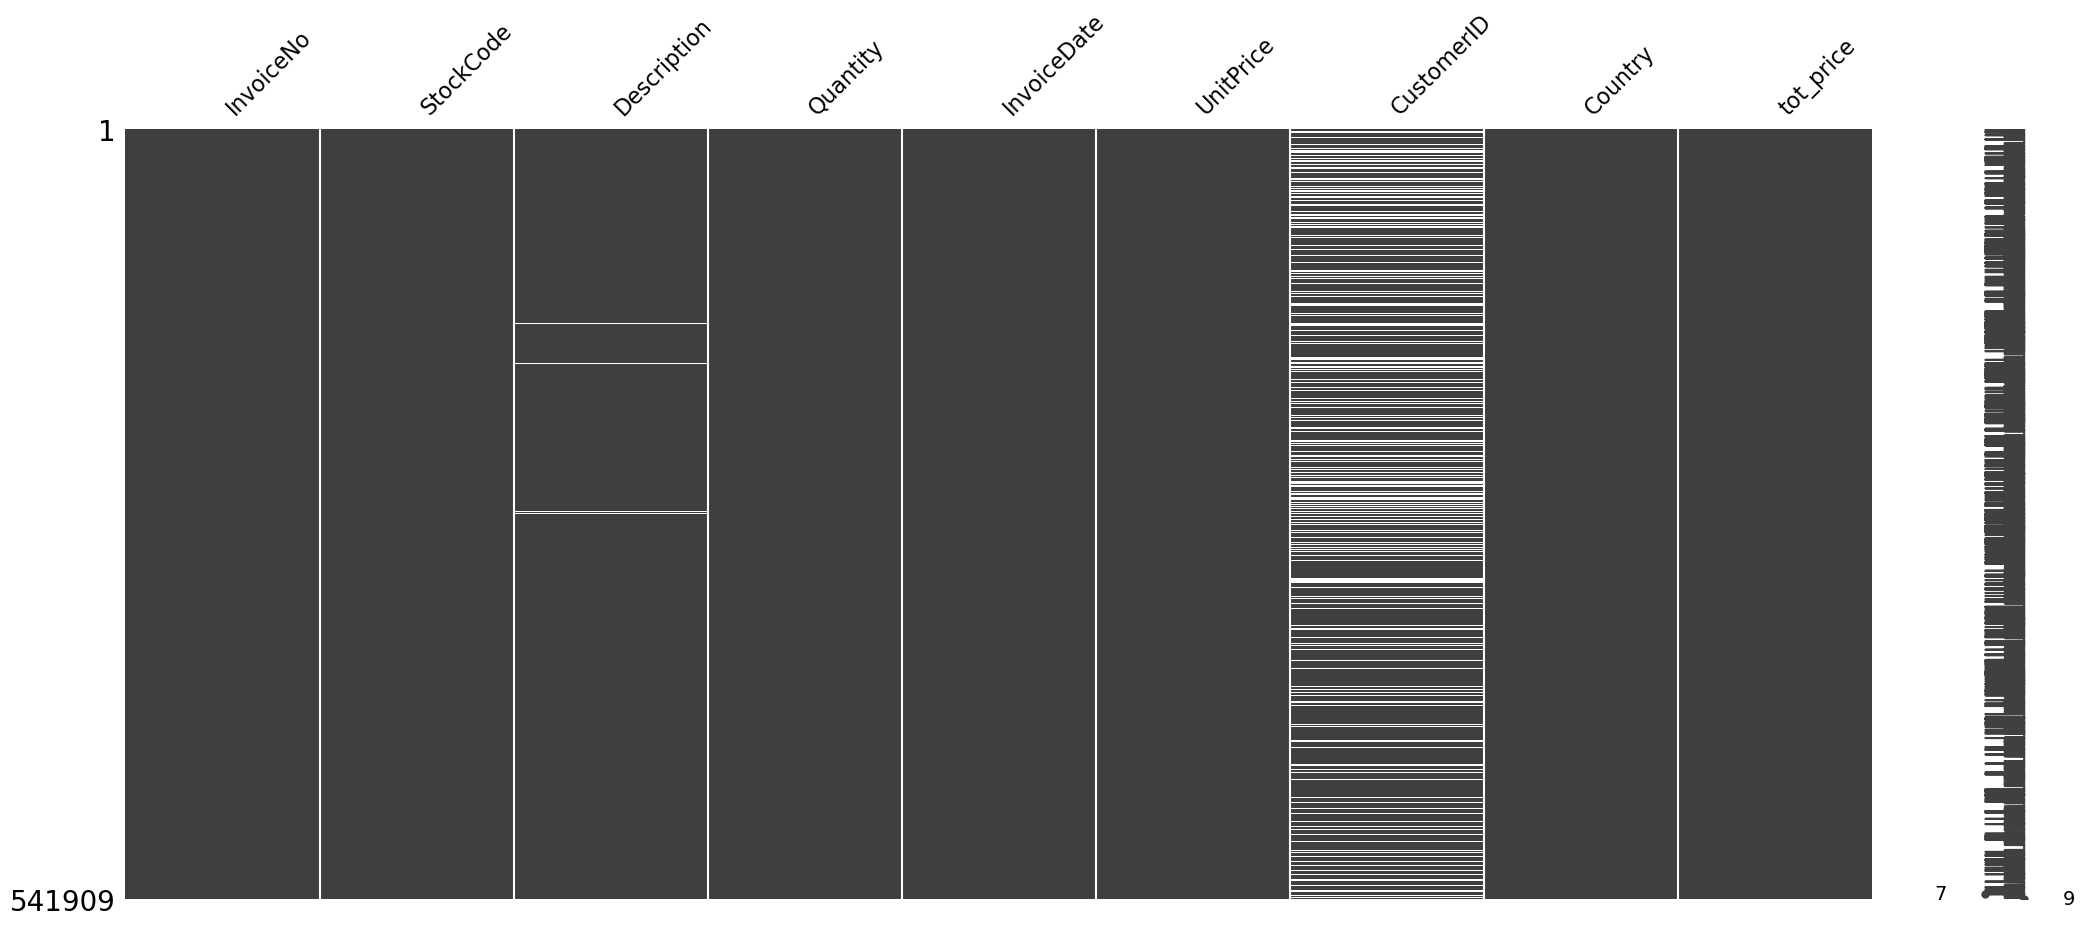

In [77]:
msno.matrix(main_df)

In [78]:
main_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
tot_price           0
dtype: int64

In [79]:
main_df=main_df[main_df['CustomerID'].isna() == False]
main_df.reset_index(inplace=True)
main_df=main_df.drop(["index"], axis=1)
main_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Barchart for Top 10 Refunded Items

In [80]:
refund=main_df.loc[main_df['Quantity'] < 0]
refund.reset_index(inplace=True)
refund=refund.drop(["index"], axis=1)
refund

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
1,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
2,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
3,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
4,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
8900,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
8901,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
8902,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
8903,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [81]:
refundgroup=refund.groupby(['Description']).sum()
refundgroup.reset_index(inplace=True)
refundgroup

,Description,Quantity,UnitPrice,CustomerID,tot_price
0,50'S CHRISTMAS GIFT BAG LARGE,-2,1.25,13136.0,-2.50
1,DOLLY GIRL BEAKER,-7,2.50,26358.0,-8.75
2,OVAL WALL MIRROR DIAMANTE,-5,39.80,63681.0,-49.75
3,SET 2 TEA TOWELS I LOVE LONDON,-8,9.15,46177.0,-25.40
4,SPACEBOY BABY GIFT SET,-6,50.85,46978.0,-101.70
...,...,...,...,...,...
1940,ZINC SWEETHEART WIRE LETTER RACK,-4,3.75,17716.0,-15.00
1941,ZINC T-LIGHT HOLDER STAR LARGE,-11,1.90,34023.0,-10.45
1942,ZINC T-LIGHT HOLDER STARS SMALL,-44,2.49,48760.0,-36.52
1943,ZINC TOP 2 DOOR WOODEN SHELF,-5,31.90,29169.0,-76.75


In [82]:
refundgroup['Quantity'] = refundgroup['Quantity'].apply(lambda x: x*-1)
refundgroup

,Description,Quantity,UnitPrice,CustomerID,tot_price
0,50'S CHRISTMAS GIFT BAG LARGE,2,1.25,13136.0,-2.50
1,DOLLY GIRL BEAKER,7,2.50,26358.0,-8.75
2,OVAL WALL MIRROR DIAMANTE,5,39.80,63681.0,-49.75
3,SET 2 TEA TOWELS I LOVE LONDON,8,9.15,46177.0,-25.40
4,SPACEBOY BABY GIFT SET,6,50.85,46978.0,-101.70
...,...,...,...,...,...
1940,ZINC SWEETHEART WIRE LETTER RACK,4,3.75,17716.0,-15.00
1941,ZINC T-LIGHT HOLDER STAR LARGE,11,1.90,34023.0,-10.45
1942,ZINC T-LIGHT HOLDER STARS SMALL,44,2.49,48760.0,-36.52
1943,ZINC TOP 2 DOOR WOODEN SHELF,5,31.90,29169.0,-76.75


In [83]:
refundquantity=refundgroup.sort_values(by=['Quantity'], ascending=False)
refundquantity

,Description,Quantity,UnitPrice,CustomerID,tot_price
1169,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,-168469.60
1010,MEDIUM CERAMIC TOP STORAGE JAR,74494,11.66,142297.0,-77479.64
1437,ROTATING SILVER ANGELS T-LIGHT HLDR,9367,5.13,48937.0,-298.65
1078,Manual,3995,105725.11,2645143.0,-112165.39
581,FAIRY CAKE FLANNEL ASSORTED COLOUR,3150,4.99,51599.0,-6591.42
...,...,...,...,...,...
636,FOLKART ZINC HEART CHRISTMAS DEC,1,0.85,15555.0,-0.85
637,FOOD CONTAINER SET 3 LOVE HEART,1,1.95,15514.0,-1.95
640,FORKED CACTUS CANDLE,1,2.95,15708.0,-2.95
190,BLUE CHECK BAG W HANDLE 34X20CM,1,0.83,14620.0,-0.83


In [84]:
top10refundquantity=refundquantity.head(10)
top10refundquantity

,Description,Quantity,UnitPrice,CustomerID,tot_price
1169,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,-168469.60
1010,MEDIUM CERAMIC TOP STORAGE JAR,74494,11.66,142297.0,-77479.64
1437,ROTATING SILVER ANGELS T-LIGHT HLDR,9367,5.13,48937.0,-298.65
1078,Manual,3995,105725.11,2645143.0,-112165.39
581,FAIRY CAKE FLANNEL ASSORTED COLOUR,3150,4.99,51599.0,-6591.42
1218,PINK BLUE FELT CRAFT TRINKET BOX,2617,5.87,74975.0,-2778.77
1861,WHITE HANGING HEART T-LIGHT HOLDER,2578,117.90,650949.0,-6624.30
700,GIN + TONIC DIET METAL SIGN,2030,15.98,101011.0,-3775.33
816,HERB MARKER BASIL,1527,1.20,31500.0,-841.05
608,FELTCRAFT DOLL MOLLY,1447,16.65,89896.0,-3512.65


Text(0, 0.5, 'Quantity')

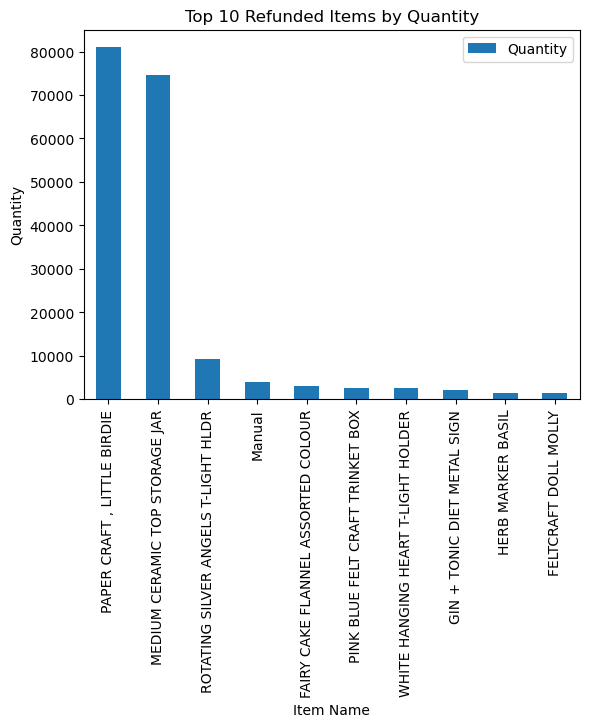

In [85]:
top10refundquantity.plot.bar(x='Description', y='Quantity')

plt.title("Top 10 Refunded Items by Quantity")
plt.xlabel("Item Name")
plt.ylabel("Quantity")

In [86]:
refundgroup['tot_price'] = refundgroup['tot_price'].apply(lambda x: x*-1)
refundgroup

,Description,Quantity,UnitPrice,CustomerID,tot_price
0,50'S CHRISTMAS GIFT BAG LARGE,2,1.25,13136.0,2.50
1,DOLLY GIRL BEAKER,7,2.50,26358.0,8.75
2,OVAL WALL MIRROR DIAMANTE,5,39.80,63681.0,49.75
3,SET 2 TEA TOWELS I LOVE LONDON,8,9.15,46177.0,25.40
4,SPACEBOY BABY GIFT SET,6,50.85,46978.0,101.70
...,...,...,...,...,...
1940,ZINC SWEETHEART WIRE LETTER RACK,4,3.75,17716.0,15.00
1941,ZINC T-LIGHT HOLDER STAR LARGE,11,1.90,34023.0,10.45
1942,ZINC T-LIGHT HOLDER STARS SMALL,44,2.49,48760.0,36.52
1943,ZINC TOP 2 DOOR WOODEN SHELF,5,31.90,29169.0,76.75


In [87]:
refundprice=refundgroup.sort_values(by=['tot_price'], ascending=False)
refundprice

,Description,Quantity,UnitPrice,CustomerID,tot_price
1169,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
1078,Manual,3995,105725.11,2645143.0,112165.39
1010,MEDIUM CERAMIC TOP STORAGE JAR,74494,11.66,142297.0,77479.64
1288,POSTAGE,118,10618.72,1410551.0,11093.72
1380,REGENCY CAKESTAND 3 TIER,857,2169.15,2666548.0,9722.55
...,...,...,...,...,...
670,FRENCH STYLE STORAGE JAR JAM,1,0.29,14796.0,0.29
1694,STRIPY DESIGN SHOWER CAP,1,0.29,17841.0,0.29
1316,RECYCLED PENCIL WITH RABBIT ERASER,1,0.21,15555.0,0.21
1677,STARS GIFT TAPE,1,0.19,17722.0,0.19


In [88]:
top10refundprice=refundprice.head(10)
top10refundprice

,Description,Quantity,UnitPrice,CustomerID,tot_price
1169,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
1078,Manual,3995,105725.11,2645143.0,112165.39
1010,MEDIUM CERAMIC TOP STORAGE JAR,74494,11.66,142297.0,77479.64
1288,POSTAGE,118,10618.72,1410551.0,11093.72
1380,REGENCY CAKESTAND 3 TIER,857,2169.15,2666548.0,9722.55
434,CRUK Commission,16,7933.43,225536.0,7933.43
1861,WHITE HANGING HEART T-LIGHT HOLDER,2578,117.90,650949.0,6624.30
581,FAIRY CAKE FLANNEL ASSORTED COLOUR,3150,4.99,51599.0,6591.42
530,Discount,1194,5581.31,1149366.0,5696.22
1154,PANTRY CHOPPING BOARD,946,30.01,97723.0,4803.06


Text(0, 0.5, 'Total Price')

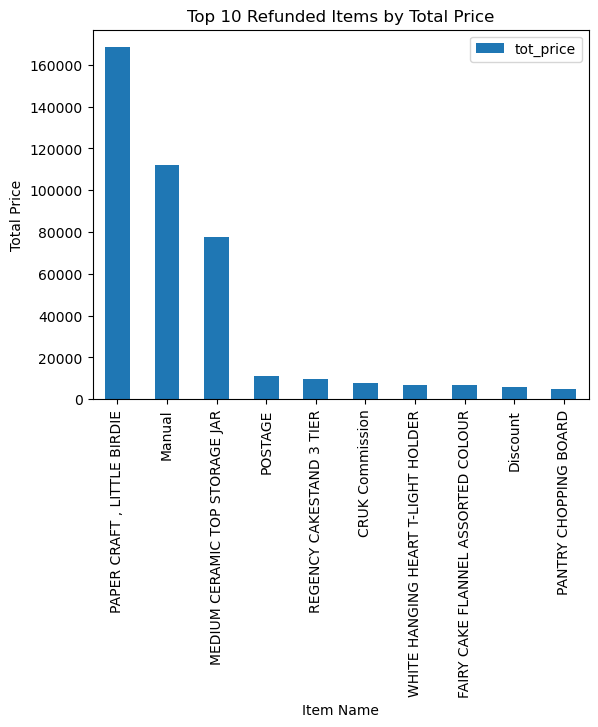

In [89]:
top10refundprice.plot.bar(x='Description', y='tot_price')

plt.title("Top 10 Refunded Items by Total Price")
plt.xlabel("Item Name")
plt.ylabel("Total Price")

In [90]:
main_df.describe()

,Quantity,UnitPrice,CustomerID,tot_price
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [91]:
numerical=main_df[['Quantity','UnitPrice']]

In [92]:
numerical

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
406824,12,0.85
406825,6,2.10
406826,4,4.15
406827,4,4.15


In [93]:
numerical[(np.abs(stats.zscore(numerical)) < 3).all(axis=1)]

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
406824,12,0.85
406825,6,2.10
406826,4,4.15
406827,4,4.15


In [94]:
numerical.dtypes

Quantity       int64
UnitPrice    float64
dtype: object

In [95]:
outlier1 = numerical[(np.abs(stats.zscore(numerical['Quantity'])) < 3)]

In [96]:
outlier2 = numerical[(np.abs(stats.zscore(numerical['UnitPrice'])) < 3)]

In [97]:
outlier1.reset_index(inplace=True)
outlier2.reset_index(inplace=True)

In [98]:
outlier1

,index,Quantity,UnitPrice
0,0,6,2.55
1,1,6,3.39
2,2,8,2.75
3,3,6,3.39
4,4,6,3.39
...,...,...,...
406636,406824,12,0.85
406637,406825,6,2.10
406638,406826,4,4.15
406639,406827,4,4.15


In [99]:
outlier2

,index,Quantity,UnitPrice
0,0,6,2.55
1,1,6,3.39
2,2,8,2.75
3,3,6,3.39
4,4,6,3.39
...,...,...,...
406675,406824,12,0.85
406676,406825,6,2.10
406677,406826,4,4.15
406678,406827,4,4.15


In [100]:
merged_df = outlier2.merge(outlier1, how = 'inner', on = ['index'])
merged_df

,index,Quantity_x,UnitPrice_x,Quantity_y,UnitPrice_y
0,0,6,2.55,6,2.55
1,1,6,3.39,6,3.39
2,2,8,2.75,8,2.75
3,3,6,3.39,6,3.39
4,4,6,3.39,6,3.39
...,...,...,...,...,...
406487,406824,12,0.85,12,0.85
406488,406825,6,2.10,6,2.10
406489,406826,4,4.15,4,4.15
406490,406827,4,4.15,4,4.15


In [101]:
merged_df=merged_df[['index']]
merged_df

,index
0,0
1,1
2,2
3,3
4,4
...,...
406487,406824
406488,406825
406489,406826
406490,406827


In [102]:
main_df.reset_index(inplace=True)
main_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
406824,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406825,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406826,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406827,406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [103]:
clean_df= main_df.merge(merged_df, how = 'inner', on = ['index'])
clean_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
406487,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406488,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406489,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406490,406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Top 10 Countries

In [104]:
countries=clean_df.groupby(['Country']).sum()
countries.reset_index(inplace=True)
countries=countries.drop(["index"], axis=1)
countries

,Country,Quantity,UnitPrice,CustomerID,tot_price
0,Australia,81541,3439.680,1.564334e+07,134638.000
1,Austria,4827,1701.520,5.021102e+06,10154.320
2,Bahrain,260,78.950,2.100270e+05,548.400
3,Belgium,23152,7540.130,2.571829e+07,40910.960
4,Brazil,356,142.600,4.086080e+05,1143.600
5,Canada,2762,359.640,2.598039e+06,3115.440
6,Channel Islands,9479,3152.550,1.125536e+07,20086.290
7,Cyprus,6317,3278.690,7.691150e+06,12946.290
8,Czech Republic,592,88.150,3.834300e+05,707.720
9,Denmark,8188,1266.950,4.876734e+06,18768.140


In [105]:
countries

,Country,Quantity,UnitPrice,CustomerID,tot_price
0,Australia,81541,3439.680,1.564334e+07,134638.000
1,Austria,4827,1701.520,5.021102e+06,10154.320
2,Bahrain,260,78.950,2.100270e+05,548.400
3,Belgium,23152,7540.130,2.571829e+07,40910.960
4,Brazil,356,142.600,4.086080e+05,1143.600
5,Canada,2762,359.640,2.598039e+06,3115.440
6,Channel Islands,9479,3152.550,1.125536e+07,20086.290
7,Cyprus,6317,3278.690,7.691150e+06,12946.290
8,Czech Republic,592,88.150,3.834300e+05,707.720
9,Denmark,8188,1266.950,4.876734e+06,18768.140


In [106]:
countries=countries.sort_values(by=['Quantity'], ascending=False)
countries

,Country,Quantity,UnitPrice,CustomerID,tot_price
35,United Kingdom,3813427,1049647.854,5.622388e+09,6615740.674
23,Netherlands,190960,6485.670,3.410266e+07,273346.980
10,EIRE,133931,29948.630,1.102747e+08,251207.310
14,Germany,117445,32292.340,1.199072e+08,220695.210
13,France,108936,28113.670,1.075732e+08,195080.360
0,Australia,81541,3439.680,1.564334e+07,134638.000
31,Sweden,34869,1806.180,6.772679e+06,36096.710
32,Switzerland,29778,6568.600,2.377592e+07,55739.400
30,Spain,26826,9791.600,3.266425e+07,57616.430
3,Belgium,23152,7540.130,2.571829e+07,40910.960


In [107]:
topcountries=countries.head(10)
topcountries

,Country,Quantity,UnitPrice,CustomerID,tot_price
35,United Kingdom,3813427,1049647.854,5.622388e+09,6615740.674
23,Netherlands,190960,6485.670,3.410266e+07,273346.980
10,EIRE,133931,29948.630,1.102747e+08,251207.310
14,Germany,117445,32292.340,1.199072e+08,220695.210
13,France,108936,28113.670,1.075732e+08,195080.360
0,Australia,81541,3439.680,1.564334e+07,134638.000
31,Sweden,34869,1806.180,6.772679e+06,36096.710
32,Switzerland,29778,6568.600,2.377592e+07,55739.400
30,Spain,26826,9791.600,3.266425e+07,57616.430
3,Belgium,23152,7540.130,2.571829e+07,40910.960


Text(0, 0.5, 'Quantity')

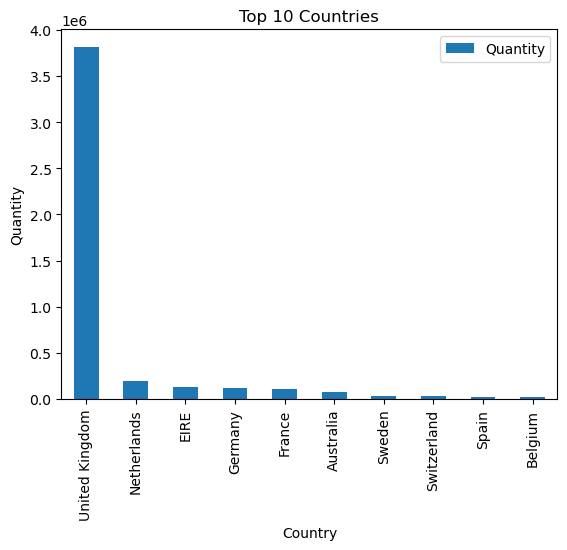

In [108]:
topcountries.plot.bar(x='Country', y='Quantity')

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Quantity")

## Cohort Analysis

In [109]:
clean_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
406487,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406488,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406489,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406490,406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [110]:
clean_df['invoice_period'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
clean_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_price,invoice_period
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
406487,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
406488,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
406489,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
406490,406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


In [111]:
clean_df.set_index('CustomerID',inplace=True)
clean_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,tot_price,invoice_period
CustomerID,,,,,,,,,,
17850.0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
17850.0,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
17850.0,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
12680.0,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011-12
12680.0,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011-12
12680.0,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011-12


In [112]:
clean_df['cohort_group'] = clean_df.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
clean_df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,tot_price,invoice_period,cohort_group
CustomerID,,,,,,,,,,,
17850.0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850.0,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850.0,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
12680.0,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011-12,2011-08
12680.0,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011-12,2011-08
12680.0,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011-12,2011-08


In [113]:
clean_df.reset_index(inplace=True)
clean_df=clean_df.drop(["index"], axis=1)
clean_df

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,tot_price,invoice_period,cohort_group
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
406487,12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011-12,2011-08
406488,12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011-12,2011-08
406489,12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011-12,2011-08
406490,12680.0,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011-12,2011-08


In [114]:
grouped = clean_df.groupby(['cohort_group', 'invoice_period'])
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                     'Description': pd.Series.nunique,
                     'Quantity': np.sum,
                     'tot_price': np.sum})
cohorts.rename(columns={'CustomerID':'total_customers',
                        'Description':'total_product_types',
                        'Quantity':'total_units'}, inplace=True)
cohorts

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                     942                 2428   
             2011-01                     361                 1835   
             2011-02                     315                 1719   
             2011-03                     365                 1870   
             2011-04                     340                 1794   
...                                      ...                  ...   
2011-10      2011-11                      93                 1319   
             2011-12                      46                  602   
2011-11      2011-11                     320                 2146   
             2011-12                      42                  730   
2011-12      2011-12                      40                  680   

                             total_units  tot_price  
cohort_group invoice_period                          
2010-12      2010-12              283953  534615.48  
             2011-01              151626  257074.56  
             2011-02              128704  226718.32  
             2011-03              173190  295680.91  
             2011-04              125532  200120.94  
...                                  ...        ...  
2011-10      2011-11               25293   39209.92  
             2011-12                7217   12279.46  
2011-11      2011-11               84104  132141.38  
             2011-12                9212   12162.53  
2011-12      2011-12               13037   22915.75  

[91 rows x 4 columns]

In [115]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts=cohorts.groupby(level=0).apply(cohort_period)
cohorts

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                     942                 2428   
             2011-01                     361                 1835   
             2011-02                     315                 1719   
             2011-03                     365                 1870   
             2011-04                     340                 1794   
...                                      ...                  ...   
2011-10      2011-11                      93                 1319   
             2011-12                      46                  602   
2011-11      2011-11                     320                 2146   
             2011-12                      42                  730   
2011-12      2011-12                      40                  680   

                             total_units  tot_price  cohort_period  
cohort_group invoice_period                                         
2010-12      2010-12              283953  534615.48              1  
             2011-01              151626  257074.56              2  
             2011-02              128704  226718.32              3  
             2011-03              173190  295680.91              4  
             2011-04              125532  200120.94              5  
...                                  ...        ...            ...  
2011-10      2011-11               25293   39209.92              2  
             2011-12                7217   12279.46              3  
2011-11      2011-11               84104  132141.38              1  
             2011-12                9212   12162.53              2  
2011-12      2011-12               13037   22915.75              1  

[91 rows x 5 columns]

In [116]:
cohorts

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                     942                 2428   
             2011-01                     361                 1835   
             2011-02                     315                 1719   
             2011-03                     365                 1870   
             2011-04                     340                 1794   
...                                      ...                  ...   
2011-10      2011-11                      93                 1319   
             2011-12                      46                  602   
2011-11      2011-11                     320                 2146   
             2011-12                      42                  730   
2011-12      2011-12                      40                  680   

                             total_units  tot_price  cohort_period  
cohort_group invoice_period                                         
2010-12      2010-12              283953  534615.48              1  
             2011-01              151626  257074.56              2  
             2011-02              128704  226718.32              3  
             2011-03              173190  295680.91              4  
             2011-04              125532  200120.94              5  
...                                  ...        ...            ...  
2011-10      2011-11               25293   39209.92              2  
             2011-12                7217   12279.46              3  
2011-11      2011-11               84104  132141.38              1  
             2011-12                9212   12162.53              2  
2011-12      2011-12               13037   22915.75              1  

[91 rows x 5 columns]

Text(0.5, 1.0, 'Retention Rates Across Cohorts')

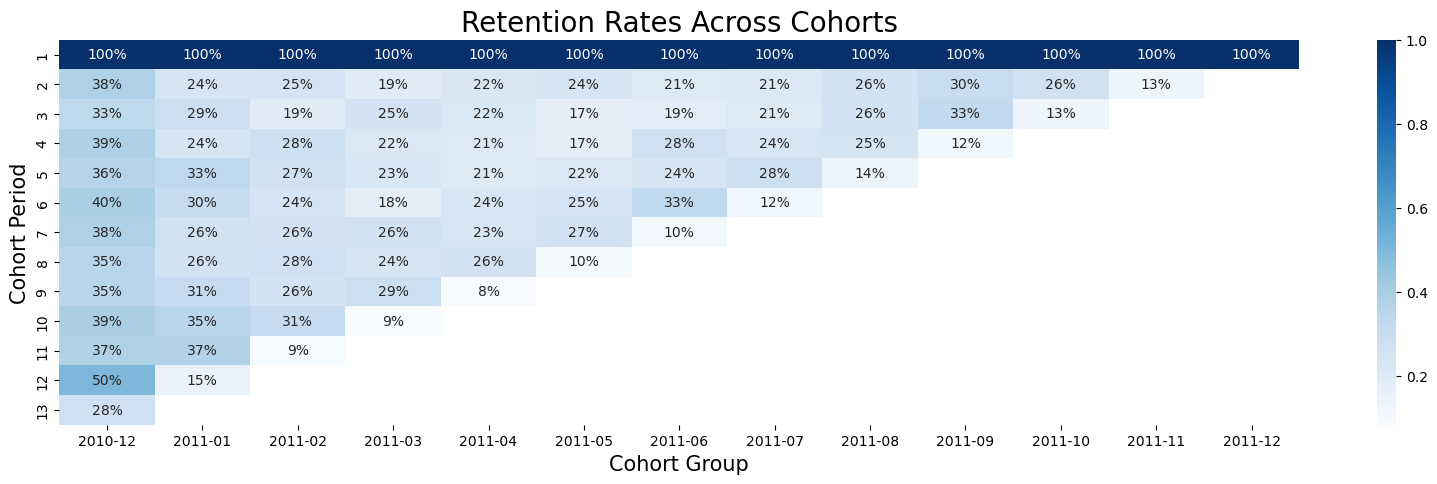

In [117]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()
user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(20,5))
ax = sb.heatmap(user_retention, annot=True,cmap='Blues', fmt='.0%')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Retention Rates Across Cohorts', fontsize = 20)

Text(0.5, 1.0, 'Monthly Active Customers Across Cohorts')

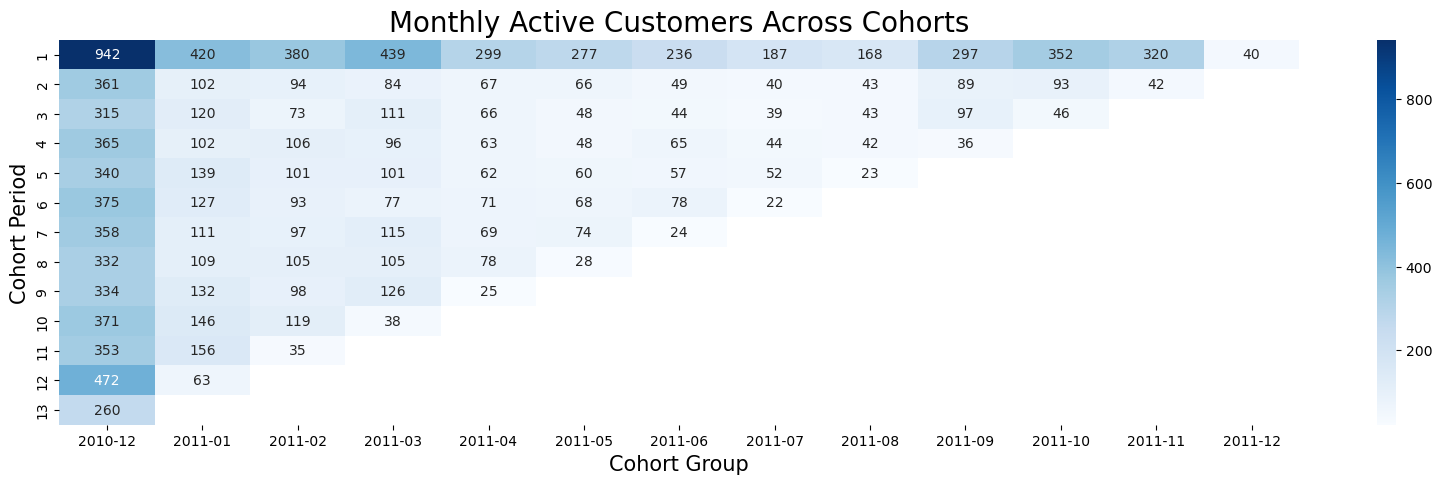

In [118]:
unstacked_cust = cohorts['total_customers'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_cust, annot = True, cmap='Blues', fmt = 'g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Active Customers Across Cohorts', fontsize = 20)

Text(0.5, 1.0, 'Monthly Total Sales Across Cohorts')

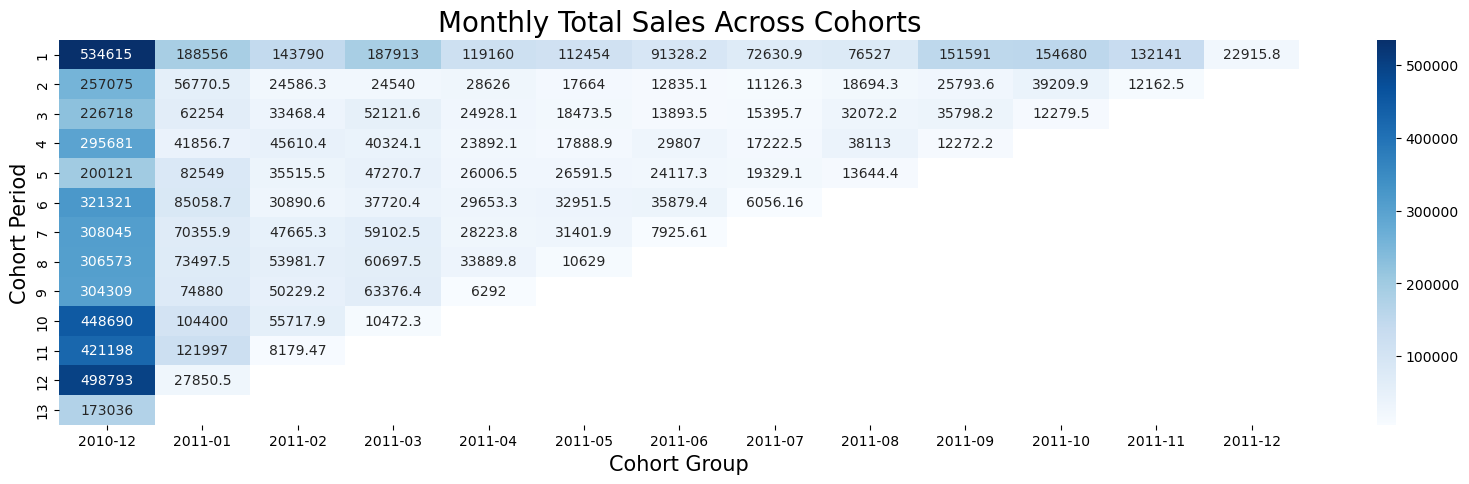

In [119]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_price'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_order, annot=True,cmap='Blues', fmt='g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Total Sales Across Cohorts', fontsize = 20)